# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [2]:
data1 <- read.csv2("graded_assignment_2.csv")
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,18,1,0,male,65+,85-89
2,30,0,1,female,65-,45-49
3,29,1,1,female,65-,40-44
4,19,1,1,male,65+,90-94
5,3,1,0,male,65-,10-14
6,31,1,1,female,65-,50-54


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [3]:
data2 <- data1 %>%
  mutate(Health_status = ifelse(FKG == 0 & DKG == 0, 1, 0))
head(data2)

ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
1,18,1,0,male,65+,85-89,0
2,30,0,1,female,65-,45-49,0
3,29,1,1,female,65-,40-44,0
4,19,1,1,male,65+,90-94,0
5,3,1,0,male,65-,10-14,0
6,31,1,1,female,65-,50-54,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [4]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  18 30 29 19 3 31 9 4 12 8 ...
 $ FKG          : int  1 0 1 1 1 1 0 1 1 1 ...
 $ DKG          : int  0 1 1 1 0 1 0 0 0 1 ...
 $ Gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 2 2 2 2 ...
 $ Elderly      : Factor w/ 2 levels "65-","65+": 2 1 1 2 1 1 1 1 1 1 ...
 $ Age          : Factor w/ 20 levels "0-4","10-14",..: 18 9 8 19 2 11 8 3 12 7 ...
 $ Health_status: num  0 0 0 0 0 0 1 0 0 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [5]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3653
female,1,1235
male,0,3792
male,1,1320


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



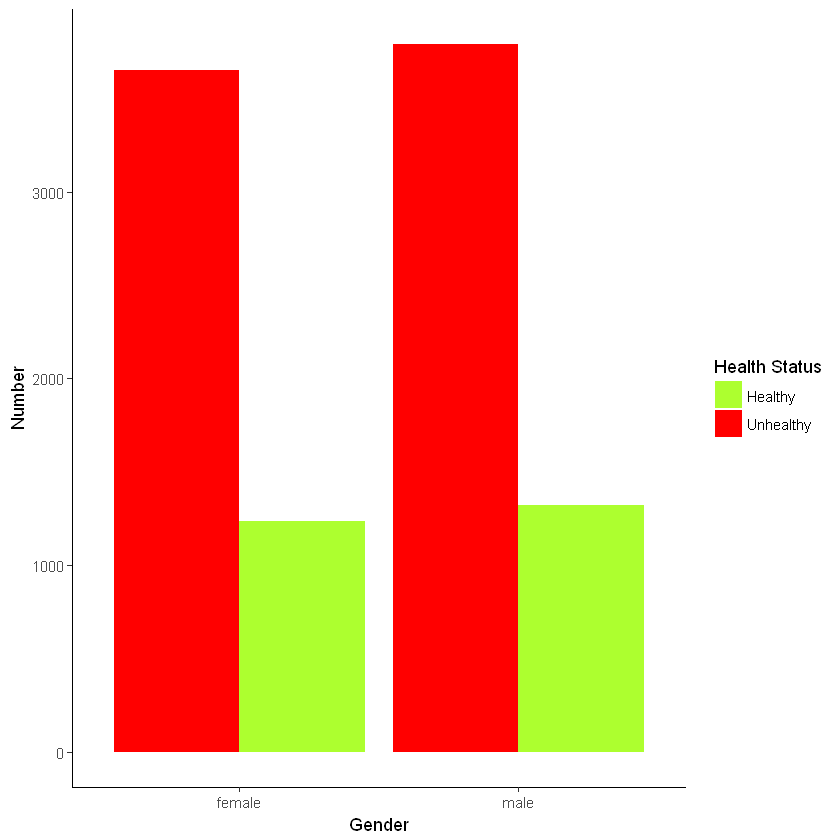

In [6]:
ggplot(data3, aes(x = Gender, y = Count_observations, fill = Health_status)) + geom_bar(stat = 'identity', position = 'dodge') + scale_fill_manual(name = 'Health Status', values = c('red', 'greenyellow'), labels = c('Healthy','Unhealthy'), breaks = c('1','0')) + ylab('Number') + theme_classic() 

End notebook